# Librerias

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Mejoramiento de datos 

In [91]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [92]:
def thetaBest(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (1/m)*(x_train.T @ (sigma-y_train))
    return theta

In [93]:
def costo(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

# Data 

In [94]:
iris = datasets.load_iris()

In [95]:
X = iris["data"][::]
y = (iris["target"]).astype(int).reshape(len(iris.target),1)

# Estandarizacion

In [96]:
for i in range(X.shape[1]):
    mean = X[:,i].mean()
    deviation =  X[:,i].std()
    X[:,i] = (X[:,i] - mean) / deviation

# Separacion de datos de testeo y entrenamiento 

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=55)

In [98]:
X_train = np.c_[np.ones((len(X_train),1)), X_train]
X_test = np.c_[np.ones((len(X_test),1)), X_test]

# One Vs All

# Setosa vs versicolor y virginica

In [99]:
theta_setosa = np.random.rand(X_train.shape[1]).reshape(X_train.shape[1],1)
theta_setosa

array([[0.77825759],
       [0.84151119],
       [0.81814495],
       [0.71770831],
       [0.24972847]])

In [100]:
eta = 0.8
n_iter = 10000
m = len(X_train)
J_set = np.zeros(n_iter)

y_train_setosa = (y_train == 0).astype(int)
for i in range(n_iter):
    J_set[i] = -(1/m)*costo(theta_setosa, X_train, y_train_setosa)
    theta_setosa = theta_setosa - eta * thetaBest(theta_setosa, X_train, y_train_setosa)
theta_setosa

array([[-4.68715228],
       [-1.85839144],
       [ 4.38462796],
       [-3.86060744],
       [-3.90648357]])

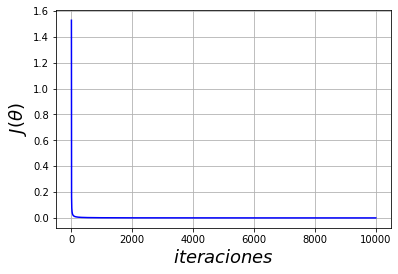

In [101]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [102]:
y_proba_setosa =np.round(sigmoid(theta_setosa.T @ X_test.T),2)
y_proba_setosa

array([[1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.67, 0.  , 0.  , 0.01, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

# Versicolor vs sotosa y virginica

In [103]:
theta_versicolor = np.random.rand(X_train.shape[1]).reshape(X_train.shape[1],1)
theta_versicolor

array([[0.42951627],
       [0.94934137],
       [0.46051137],
       [0.47327574],
       [0.50593262]])

In [104]:
eta = 0.8
n_iter = 10000
m = len(X_train)
J_vers = np.zeros(n_iter)

y_train_versicolor = (y_train == 1).astype(int)
for i in range(n_iter):
    J_vers[i] = -(1/m)*costo(theta_versicolor, X_train, y_train_versicolor)
    theta_versicolor = theta_versicolor - eta * thetaBest(theta_versicolor, X_train, y_train_versicolor)
theta_versicolor

array([[-1.0900476 ],
       [ 0.89404648],
       [-1.94127996],
       [ 1.00774803],
       [-2.14137318]])

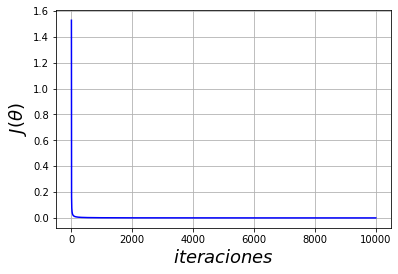

In [105]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [106]:
y_proba_ver = np.round(sigmoid(theta_versicolor.T @ X_test.T),2)
y_proba_ver

array([[0.38, 0.12, 0.38, 0.2 , 0.01, 0.45, 0.15, 0.15, 0.  , 0.14, 0.03,
        0.18, 0.02, 0.31, 0.07, 0.06, 0.76, 0.88, 0.82, 0.72, 0.04, 0.75,
        0.15, 0.36, 0.34, 0.55, 0.84, 0.86, 0.01, 0.47]])

# virginica vs sotosa y versicolor

In [107]:
theta_virginica = np.random.rand(X_train.shape[1]).reshape(X_train.shape[1],1)
theta_virginica

array([[0.52037671],
       [0.98464935],
       [0.64840702],
       [0.21886623],
       [0.7059996 ]])

In [108]:
eta = 0.8
n_iter = 10000
m = len(X_train)
J_vir = np.zeros(n_iter)

y_train_virg = (y_train == 2).astype(int)
for i in range(n_iter):
    J_vir[i] = -(1/m)*costo(theta_virginica, X_train, y_train_virg)
    theta_virginica = theta_virginica - eta * thetaBest(theta_virginica, X_train, y_train_virg)
theta_virginica

array([[-12.41931227],
       [ -2.67996335],
       [ -0.99933044],
       [ 11.82203353],
       [  9.57329503]])

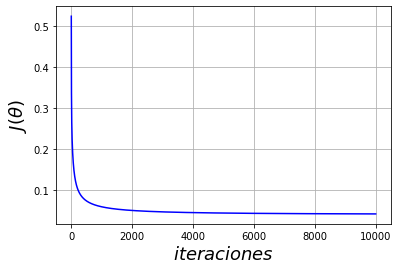

In [109]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [110]:
y_proba_vir = np.round(sigmoid(theta_virginica.T @ X_test.T),2)
y_proba_vir

array([[0.  , 0.  , 0.  , 0.99, 1.  , 0.  , 1.  , 0.98, 0.  , 0.  , 0.  ,
        0.06, 1.  , 0.  , 1.  , 0.84, 0.  , 0.  , 0.  , 1.  , 0.02, 1.  ,
        0.11, 1.  , 0.01, 0.  , 1.  , 0.  , 1.  , 0.02]])

# Comparacion 

In [111]:
compar = np.concatenate((y_proba_setosa, y_proba_ver, y_proba_vir), axis =0).T
compar

array([[1.  , 0.38, 0.  ],
       [1.  , 0.12, 0.  ],
       [1.  , 0.38, 0.  ],
       [0.  , 0.2 , 0.99],
       [0.  , 0.01, 1.  ],
       [1.  , 0.45, 0.  ],
       [0.  , 0.15, 1.  ],
       [0.  , 0.15, 0.98],
       [1.  , 0.  , 0.  ],
       [1.  , 0.14, 0.  ],
       [1.  , 0.03, 0.  ],
       [0.  , 0.18, 0.06],
       [0.  , 0.02, 1.  ],
       [1.  , 0.31, 0.  ],
       [0.  , 0.07, 1.  ],
       [0.  , 0.06, 0.84],
       [0.  , 0.76, 0.  ],
       [0.67, 0.88, 0.  ],
       [0.  , 0.82, 0.  ],
       [0.  , 0.72, 1.  ],
       [0.01, 0.04, 0.02],
       [0.  , 0.75, 1.  ],
       [0.  , 0.15, 0.11],
       [0.  , 0.36, 1.  ],
       [0.  , 0.34, 0.01],
       [0.  , 0.55, 0.  ],
       [0.  , 0.84, 1.  ],
       [0.  , 0.86, 0.  ],
       [0.  , 0.01, 1.  ],
       [0.  , 0.47, 0.02]])

In [112]:
prediction_final = []
for i in range(len(compar)):
    #print(compar[i])
    index_value = compar[i].argmax()
    prediction_final.append(index_value)
prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))

In [113]:
last_data = np.concatenate((y_proba_setosa, y_proba_ver, y_proba_vir, prediction_final, y_test.reshape(1, len(y_test)) ), axis =0).T
last_data

array([[1.  , 0.38, 0.  , 0.  , 0.  ],
       [1.  , 0.12, 0.  , 0.  , 0.  ],
       [1.  , 0.38, 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.99, 2.  , 2.  ],
       [0.  , 0.01, 1.  , 2.  , 2.  ],
       [1.  , 0.45, 0.  , 0.  , 0.  ],
       [0.  , 0.15, 1.  , 2.  , 2.  ],
       [0.  , 0.15, 0.98, 2.  , 2.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.14, 0.  , 0.  , 0.  ],
       [1.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.18, 0.06, 1.  , 1.  ],
       [0.  , 0.02, 1.  , 2.  , 2.  ],
       [1.  , 0.31, 0.  , 0.  , 0.  ],
       [0.  , 0.07, 1.  , 2.  , 2.  ],
       [0.  , 0.06, 0.84, 2.  , 1.  ],
       [0.  , 0.76, 0.  , 1.  , 1.  ],
       [0.67, 0.88, 0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.  , 1.  , 1.  ],
       [0.  , 0.72, 1.  , 2.  , 2.  ],
       [0.01, 0.04, 0.02, 1.  , 1.  ],
       [0.  , 0.75, 1.  , 2.  , 2.  ],
       [0.  , 0.15, 0.11, 1.  , 1.  ],
       [0.  , 0.36, 1.  , 2.  , 2.  ],
       [0.  , 0.34, 0.01, 1.  , 1.  ],
       [0.  , 0.55, 0.  ,

In [114]:
cm = confusion_matrix(y_test, prediction_final.flatten())
cm

array([[ 8,  1,  0],
       [ 0,  9,  1],
       [ 0,  0, 11]], dtype=int64)

In [115]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9333333333333333

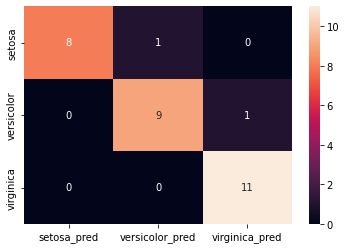

In [116]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [117]:
print(classification_report(y_test,  prediction_final.flatten(), target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
  versicolor       0.90      0.90      0.90        10
   virginica       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

